In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

with open('maxConvsBenign3.pkl', 'rb') as f:
    benignNew = pickle.load(f)
#print(benign)

with open('maxConvsMalicious3.pkl', 'rb') as f:
    maliciousNew = pickle.load(f)
#print(malicious)
with open('maxConvsBenign4.pkl', 'rb') as f:
    benignOld = pickle.load(f)
#print(benign)

with open('maxConvsMalicious4.pkl', 'rb') as f:
    maliciousOld = pickle.load(f)
#print(malicious)

# Create a DataFrame with a column named "anomaly score"
benignOld_df = pd.DataFrame({'anomaly score': benignOld})
benignNew_df = pd.DataFrame({'anomaly score': benignNew})

# Add the "verdict" column based on your condition
benignOld_df['verdict'] = benignOld_df['anomaly score'].apply(lambda x: 'MALICIOUS' if x > 0.8 else 'BENIGN')
benignNew_df['verdict'] = benignNew_df['anomaly score'].apply(lambda x: 'MALICIOUS' if x > 0.8 else 'BENIGN')

# Print the statistics about the "MALICIOUS" entries
#malicious_count = (benign_df['verdict'] == 'MALICIOUS').sum()
#total_count = len(benign_df)
#print(malicious_count)
#print(malicious_count/total_count)
benignNew_df.describe()
plt.title('benign')
plt.boxplot(np.log(benignOld_df['anomaly score']))
plt.show()
#benign_df['anomaly score'].describe()

FileNotFoundError: [Errno 2] No such file or directory: 'maxConvsBenign3.pkl'

In [2]:
# Create df with anomaly score column
maliciousOld_df = pd.DataFrame({'anomaly score': maliciousOld})
maliciousNew_df = pd.DataFrame({'anomaly score': maliciousNew})

threshold = 0.0414269460152369

# Add the "verdict" column based on condition
maliciousOld_df['verdict'] = maliciousOld_df['anomaly score'].apply(lambda x: 'MALICIOUS' if x > 0.8 else 'BENIGN')
maliciousNew_df['verdict'] = maliciousNew_df['anomaly score'].apply(lambda x: 'MALICIOUS' if x > threshold else 'BENIGN')

# Print the statistics about the "MALICIOUS" entries
malicious_count = (maliciousOld_df['verdict'] == 'MALICIOUS').sum()
total_count = len(maliciousOld_df)
#print(malicious_count)
#print(malicious_count/total_count)
maliciousOld_df.describe()
#plt.title('malicious')
#plt.boxplot(np.log(malicious_df['anomaly score']))
#plt.boxplot(np.log(benign_df['anomaly score']))

#plt.show()
maliciousOld_df['anomaly score'].describe()

# Assuming you have the dataframes maliciousOld_df, maliciousNew_df, benignOld_df, and benignNew_df

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Anomaly scores')

# Combine the data for maliciousOld and maliciousNew, and benignOld and benignNew
malicious_data = [np.log(maliciousOld_df['anomaly score']), np.log(maliciousNew_df['anomaly score'])]
benign_data = [np.log(benignOld_df['anomaly score']), np.log(benignNew_df['anomaly score'])]

# Create two boxplots with different colors
boxplot1 = ax1.boxplot(malicious_data, patch_artist=True, labels=['Old', 'New'])
boxplot2 = ax2.boxplot(benign_data, patch_artist=True, labels=['Old', 'New'])

# Set the fill colors for the boxes using RGB values
malicious_colors = ['lightblue', 'lightgreen']
benign_colors = ['lightpink', 'orange']  # Use valid RGB value for "orange"

for patch, color in zip(boxplot1['boxes'], malicious_colors):
    patch.set_facecolor(color)

for patch, color in zip(boxplot2['boxes'], benign_colors):
    patch.set_facecolor(color)

# Set titles for the subplots
ax1.set_title('Malicious')
ax2.set_title('Benign')

#plt.show()
print(maliciousNew_df['verdict'])
print(maliciousNew_df['verdict'].value_counts()/len(maliciousNew_df.index))


print(benignNew_df['verdict'])
print(benignNew_df['verdict'].value_counts()/len(benignNew_df.index))
benignNew_df['anomaly score'].describe()

NameError: name 'maliciousOld' is not defined

In [3]:
# Seen data, model trained on 360,000 packets and tested on 30,000 packets
with open('seen.pkl', 'rb') as f:
    test = pickle.load(f)

test_df = pd.DataFrame({'anomaly score': test})
test_df.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'seen.pkl'

In [4]:
# Seen data, model trained on 360,000 packets and tested on 30,000 packets
with open('unseen.pkl', 'rb') as f:
    test = pickle.load(f)

test_df = pd.DataFrame({'anomaly score': test})
test_df.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'unseen.pkl'

In [17]:
# Unseen data, model trained on 360,000 packets and tested on 30,000 packets
with open('tuesdaybenign30.pkl', 'rb') as f:
    test = pickle.load(f)

test_df = pd.DataFrame({'anomaly score': test})
test_df.describe()

,anomaly score
count,29999.000000
mean,0.032437
std,0.047307
min,0.002327
25%,0.005393
50%,0.009404
75%,0.043250
max,0.221550


In [16]:
# Unseen data, model trained on 360,000 packets and tested on 30,000 packets
with open('tuesdaymalicious30.pkl', 'rb') as f:
    test = pickle.load(f)

test_df = pd.DataFrame({'anomaly score': test})
test_df.describe()

,anomaly score
count,29999.000000
mean,0.013998
std,0.039740
min,0.002032
25%,0.002275
50%,0.002449
75%,0.002695
max,0.318722


In [2]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Specify the directory where your pickle files are located
directory = '.'  # Replace with the actual directory path

# Initialize empty dataframes and a list to store attack types
dfs = []
attack_types = []

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".pkl"):
        # Parse the day and attack type from the filename
        parts = filename.split("_")
        day = parts[0]
        attack_type = parts[1]
        attack_types.append(attack_type)
        
        # Load the pickle file into a dataframe
        df = pd.DataFrame({'anomaly_score': pd.read_pickle(os.path.join(directory, filename))})
        df['Attack Type'] = attack_type  # Add an 'Attack Type' column
        df['Day'] = day  # Add a 'Day' column
        dfs.append(df)

# Assuming dfs is a list of DataFrames with columns: 'anomaly_score', 'Attack Type', and 'Day'

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Get unique days
unique_days = combined_df['Day'].unique()

def plot_boxplots(dfs, use_log_scale=False, include_outliers=True):
    combined_df = pd.concat(dfs, ignore_index=True)
    unique_days = combined_df['Day'].unique()
    
    days_order = ['UNSW', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    combined_df['Day'] = pd.Categorical(combined_df['Day'], categories=days_order, ordered=True)
    
    for day in unique_days:
        plt.figure(figsize=(8, 6))
        day_data = combined_df[combined_df['Day'] == day]
        save_data = day_data[['Attack Type', 'anomaly_score']]
        with open(f'{day}_results.pickle', 'wb') as handle:
            pickle.dump(save_data, handle)
        title = f"{day} - Boxplot of Reconstruction Error of Each Conversation by Attack Type"
        if use_log_scale and not include_outliers:
            title += " (Log Scale, Outliers Excluded)"
        elif use_log_scale:
            title += " (Log Scale)"
        elif not include_outliers:
            title += " (Outliers Excluded)"

        plt.title(title)
        plt.xlabel("Attack Type")
        plt.ylabel("Reconstruction Error of Each Conversation")

        if use_log_scale:
            plt.yscale('log')
        day_data = day_data[~(day_data['Attack Type'].isin(['Web Attack - SQL Injection - New', 'Web Attack - SQL Injection - Attempted - New', 'Web Attack - XSS - New', 'Web Attack - XSS - Attempted - New']))]

        sns.boxplot(x='Attack Type', y='anomaly_score', data=day_data, hue='Attack Type', showfliers=include_outliers, order=['Benign', 'Analysis', 'Backdoor', 'DoS', 'Exploits', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])
        
        plt.xticks(rotation=45)
        plt.xticks([], [])
        line = plt.axhline(y=0.111996, label="MAD threshold: 0.073617", color='orange')
#         line = plt.axhline(y=0.0557, label="EER threshold: 0.0739", linestyle='dashed')
#        line = plt.axhline(y=0.032549, label="Test set reconstruction error threshold: 0.032549", color='red', linestyle='dashed')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
        
        plt.tight_layout()  # Ensures everything fits in the figure
        
        plt.show()

In [3]:
print(dfs)

[    anomaly_score              Attack Type     Day
0        0.075300  benign - small - sanity  Friday
1        0.006166  benign - small - sanity  Friday
2        0.025531  benign - small - sanity  Friday
3        0.005023  benign - small - sanity  Friday
4        0.010906  benign - small - sanity  Friday
..            ...                      ...     ...
68       0.007306  benign - small - sanity  Friday
69       0.005154  benign - small - sanity  Friday
70       0.006747  benign - small - sanity  Friday
71       0.004912  benign - small - sanity  Friday
72       0.006885  benign - small - sanity  Friday

[73 rows x 3 columns],     anomaly_score     Attack Type     Day
0        0.047885  benign - small  Friday
1        0.012147  benign - small  Friday
2        0.016677  benign - small  Friday
3        0.016743  benign - small  Friday
4        0.018053  benign - small  Friday
5        0.016159  benign - small  Friday
6        0.014810  benign - small  Friday
7        0.023639  benign -

['benign - small' 'Botnet - Attempted' 'Botnet' 'DDoS' 'Portscan']


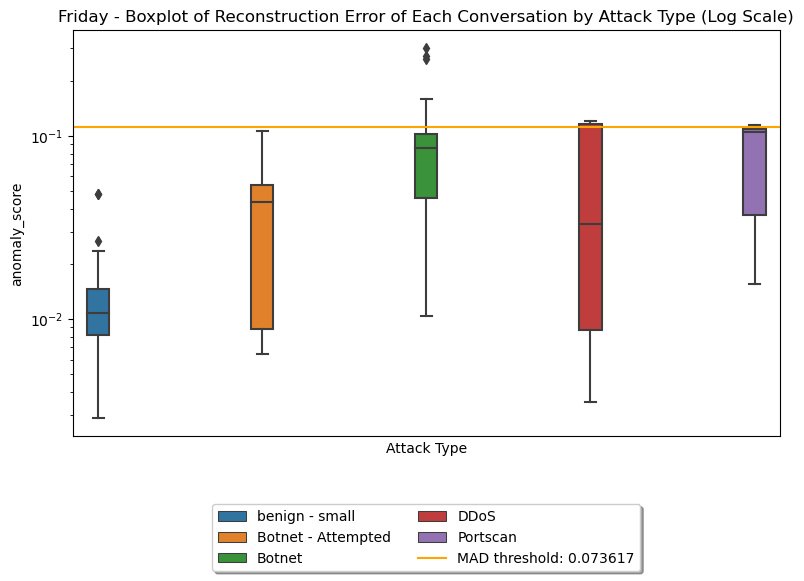

['benign - small' 'Infiltration - Attempted' 'Infiltration'
 'Web Attack - Brute Force - Attempted' 'Web Attack - Brute Force'
 'Web Attack - SQL Injection - Attempted' 'Web Attack - SQL Injection'
 'Web Attack - XSS - Attempted' 'Web Attack - XSS']


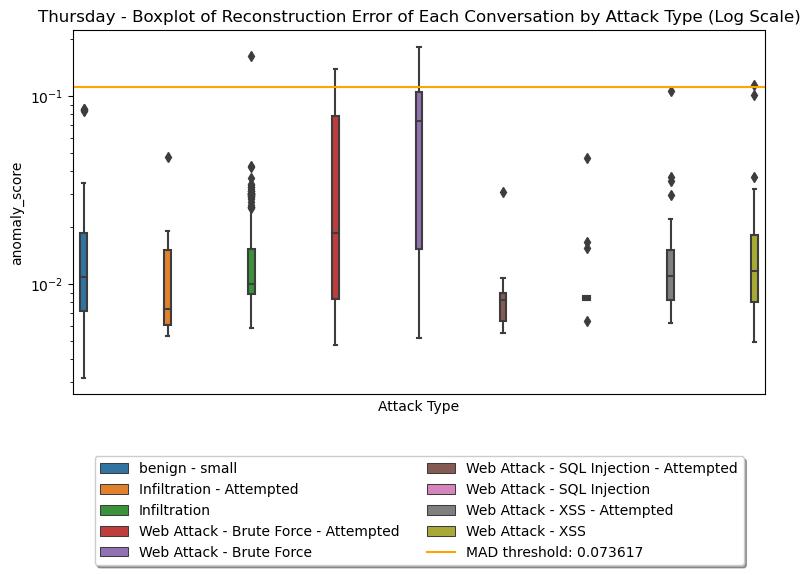

['benign - small' 'FTP-Patator - Attempted' 'FTP-Patator'
 'SSH-Patator - Attempted' 'SSH-Patator']


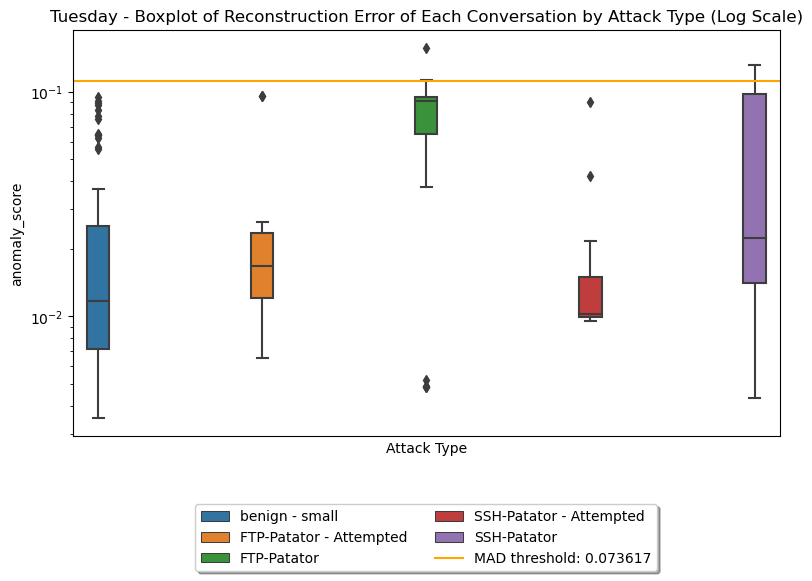

['Analysis' 'Backdoor' 'Benign' 'DoS' 'Exploits' 'Generic'
 'Reconnaissance' 'Shellcode' 'Worms']


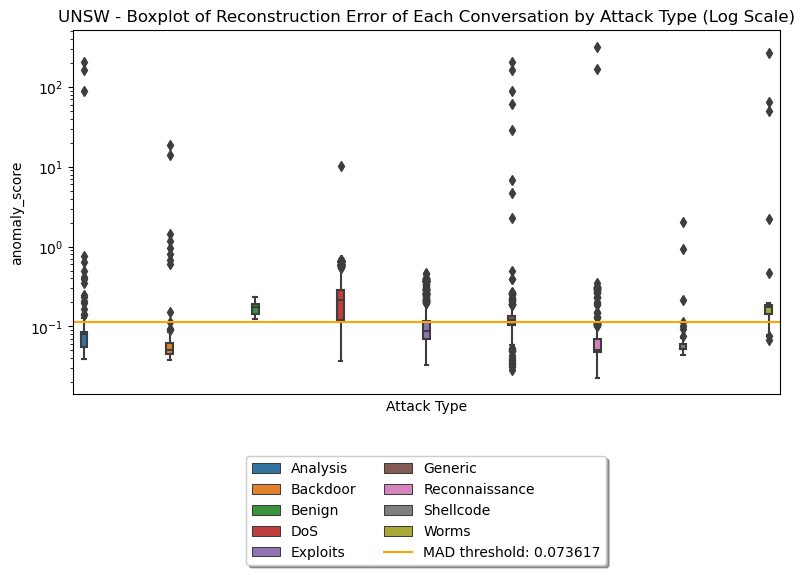

['benign - small' 'DoS GoldenEye - Attempted' 'DoS GoldenEye'
 'DoS Hulk - Attempted' 'DoS Hulk' 'DoS Slowhttptest - Attempted'
 'DoS Slowhttptest' 'DoS Slowloris - Attempted' 'DoS Slowloris'
 'Heartbleed']


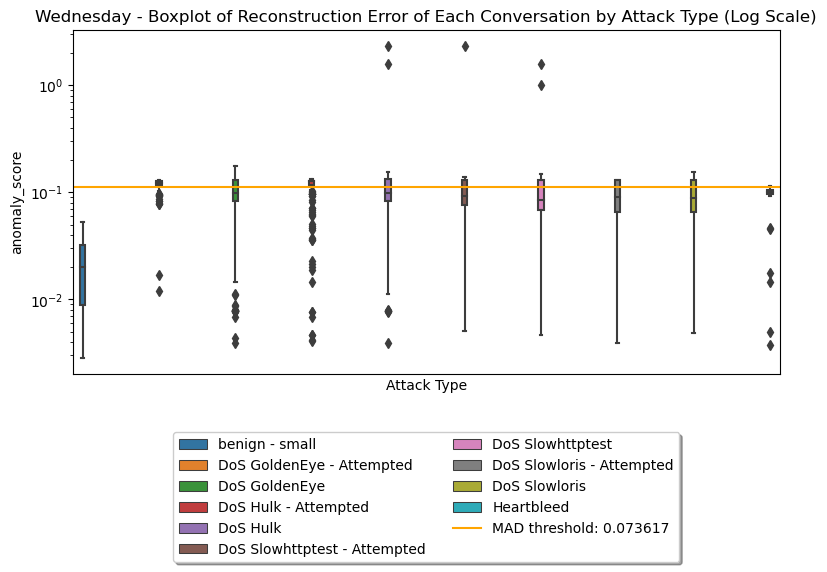

In [19]:
plot_boxplots(dfs, use_log_scale=True, include_outliers=True)

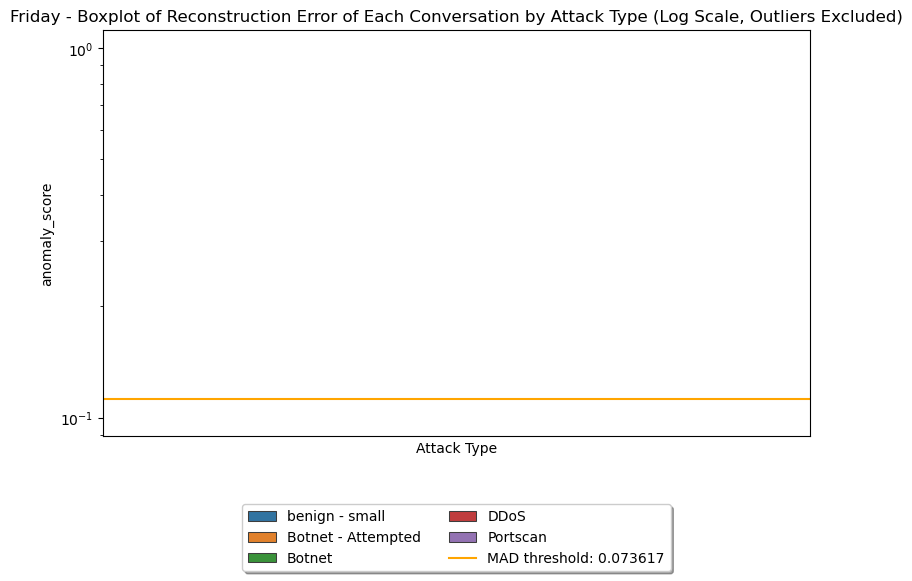

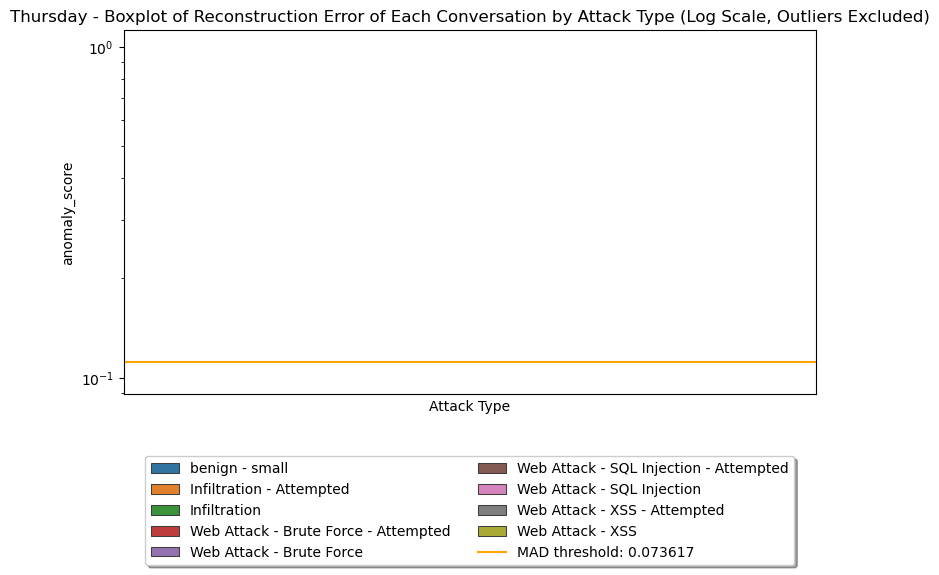

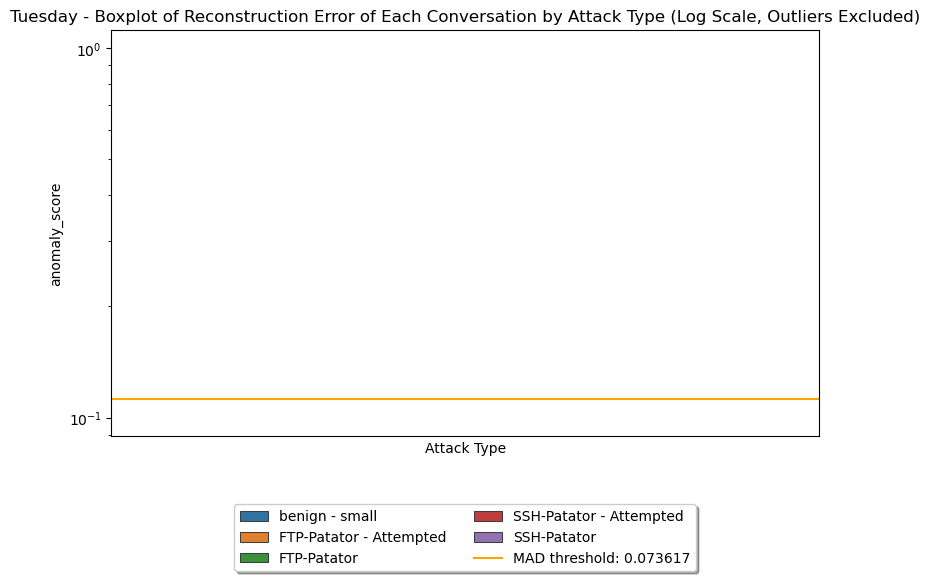

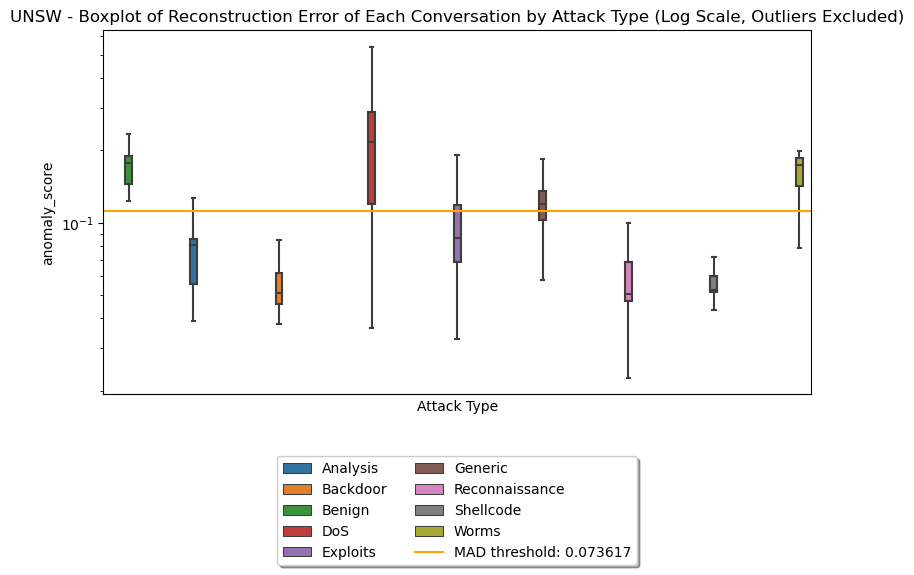

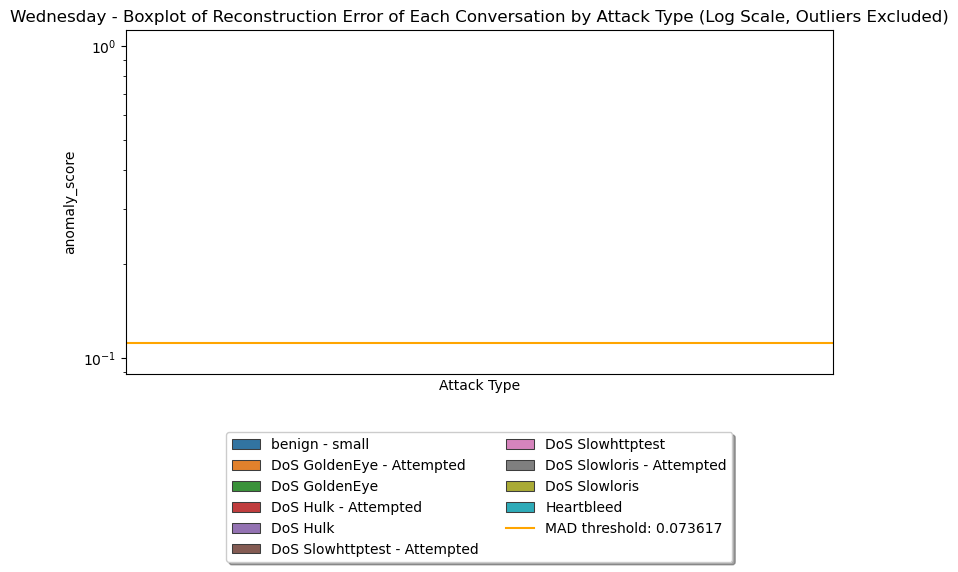

In [21]:
plot_boxplots(dfs, use_log_scale=True, include_outliers=False)

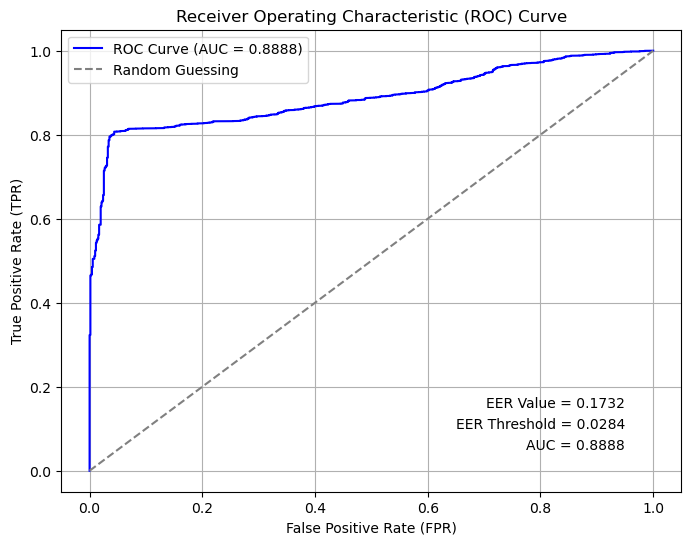

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc

import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Specify the directory where your pickle files are located
directory = '.'  # Replace with the actual directory path

# Initialize empty dataframes and a list to store attack types
dfs = []
attack_types = []

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".pkl"):
        # Parse the day and attack type from the filename
        parts = filename.split("_")
        day = parts[0]
        attack_type = parts[1]
        attack_types.append(attack_type)
        
        # Load the pickle file into a dataframe
        df = pd.DataFrame({'anomaly_score': pd.read_pickle(os.path.join(directory, filename))})
        df['Attack Type'] = attack_type  # Add an 'Attack Type' column
        df['Day'] = day  # Add a 'Day' column
        dfs.append(df)

# Assuming dfs is a list of DataFrames with columns: 'anomaly_score', 'Attack Type', and 'Day'

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Get unique days
unique_days = combined_df['Day'].unique()
combined_df['verdict'] = combined_df['Attack Type'].apply(lambda x: 0.0 if 'benign' in x else 1.0)

fpr, tpr, threshold = roc_curve(combined_df['verdict'], combined_df['anomaly_score'], pos_label=1)
fpr, tpr, threshold = roc_curve(combined_df['verdict'], combined_df['anomaly_score'], pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
eer_value = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()

# Annotation for AUC, EER Value, and EER Threshold at the bottom right
plt.text(0.95, 0.05, f'AUC = {roc_auc:.4f}', ha='right', fontsize=10, color='black')
plt.text(0.95, 0.1, f'EER Threshold = {eer_threshold:.4f}', ha='right', fontsize=10, color='black')
plt.text(0.95, 0.15, f'EER Value = {eer_value:.4f}', ha='right', fontsize=10, color='black')

plt.show()